In [28]:
%reload_ext autoreload
%autoreload 2
from env import SingleStateSpace 
from generate_trajectory import generate_trajectory
from policy import Boltzmann 
from learn import compute_q_with_values
from RewardFunctions import SingleStateReward
import numpy as np 
from learn import policy_iteration
from utils import normalise_pi
from policy_walk import policy_walk 

In [29]:

trajectory_length = 20 
#set up the agent and their policy 
env = SingleStateSpace(n_actions = 10, discount_rate = 0.1, R_max = 5)
#so we have access to env.reward
observation_times = np.cumsum(np.random.uniform(0, 2, size=trajectory_length))
print("Generated observation times:") 
print(observation_times)

#this isn't right but for now I'm just normalising pi - really it should be a boltzmann - later on I turn the Q-vals into a distribution via boltzmann 
#so it won't be able to learn i don't think 


# Use meshgrid to create a grid of all possible combinations of s, a, and t
s_grid, a_grid, t_grid = np.meshgrid(env.states, env.actions, observation_times, indexing='ij')
R = np.vectorize(env.reward)(s_grid,a_grid,t_grid)

# Calculate the reward for each combination using vectorized operations - oh I'm not actually using a boltzmann policy here I'm just using a normalised reward vector? 
(optimal_pi, optimal_values) = policy_iteration(env, len(observation_times), R)
optimal_q_values = np.ones((env.n_states, env.n_actions, len(observation_times)))
for s in range(env.n_states):
    for a in range(env.n_actions): 
        for t in range(len(observation_times)):
            optimal_q_values[s,a,t] = compute_q_with_values(env,s,a,t,optimal_values,R) 

boltzmann_policy = Boltzmann(optimal_q_values, env.actions)

#What is my initial policy? Everywhere I've seen, boltzmann is defined using the Q-values but you
#need a policy to find the Q-values so what is the actual policy? 
#Is it just like an exponential style distribution over the rewards? 
observations = generate_trajectory(env, boltzmann_policy, observation_times)

print("Generated trajectory") 
print(observations)

print("Running policy walk") 
learned_pi = policy_walk(env, observations, optimal_q_values) # there's a better way than passing in the Q* values but I cba dealing with it now 
print("finished learning policy")

Generated observation times:
[ 1.00697308  2.91287323  4.10658155  5.68738651  5.79412751  6.51283303
  7.95265628  9.83439244 10.77163603 12.70953234 12.7652062  13.58825679
 14.12979979 15.64724318 17.1335552  17.40316717 18.75009833 19.52102384
 20.12695428 21.48240773]
reward 0.36276690635541003
reward 5.562655202233162e-08
reward 0.29389793475791304
reward 2.8698467388306646e-10
reward 1.0430950490299399e-10
reward 0.10140186704271242
reward 0.40351000528347314
reward 4.1186699092733806e-07
reward 0.006973723598176865
reward 0.9190897871987216
reward 1.853759707086606e-23
reward 1.3994519595131262e-18
reward 0.00026439951809309643
reward 0.8829935595790024
reward 0.4720234565122753
reward 0.7003259391798086
reward 0.20966292145800444
reward 1.3279139254814981e-09
reward 6.420768972974323e-35
reward 0.7923776146089573
Generated trajectory
[[0, 0, 0], [0, 7, 1], [0, 3, 2], [0, 1, 3], [0, 1, 4], [0, 5, 5], [0, 7, 6], [0, 6, 7], [0, 7, 8], [0, 7, 9], [0, 0, 10], [0, 0, 11], [0, 3, 12]

TypeError: super(type, obj): obj must be an instance or subtype of type

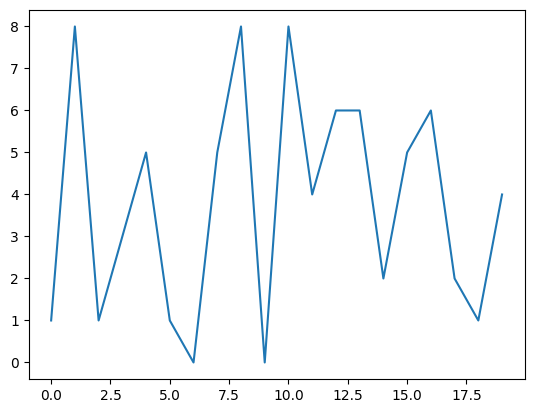

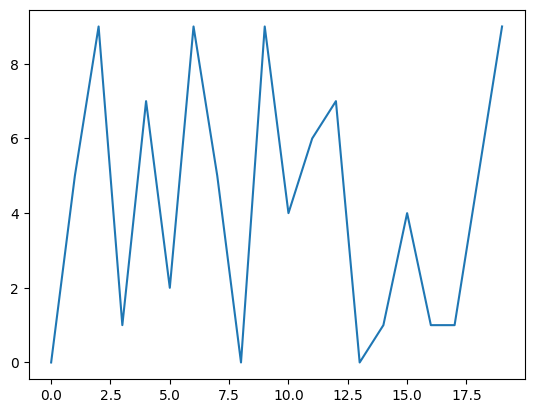

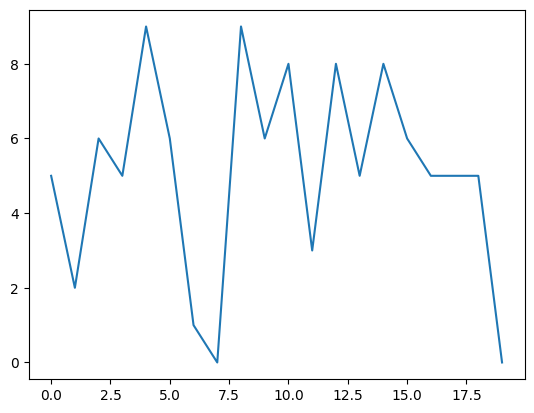

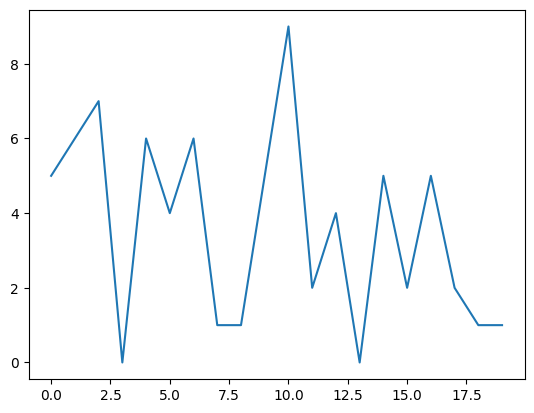

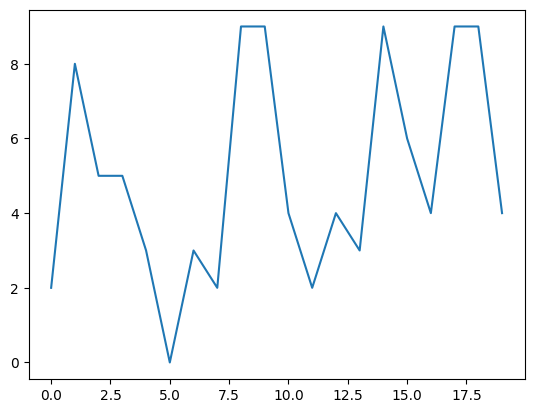

In [24]:
pi = np.ones((env.n_states,len(observations)))

import matplotlib.pyplot as plt 
for i in range(5):
    for s in range(env.n_states):
        for t in range(len(observations)): 
            pi[s,t] = boltzmann_policy(s,t)
    plt.plot(pi[0])
    plt.show()
